# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

##### Assignment done by
<pre>
Linoy A. 4798
Boaz A. 8610
</pre>

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)


##### AI agent name:chatGPT
<pre> 
Goal: for bonus- ideas for feature engineering, new algorithms, unused validations, imbalanced data
Propmpt1: how to code pairplot, curreletion matrix, historam, scatter plot summary table and more EDA visualisations in python.
    
Propmpt2: devide and show an outline for machine learning using KMM algorithm
    
Propmpt3: for this code [...] i want to add new feature engineering, new algorithms, unused validations, imbalanced data.
        give me ideas, and how to code it. also explain how they work.


AI agent name 2: XAI - GROK
Goal: understanding if accuracy 1.0 is too good to be true or realistic one
Propmpt1: I got f1 score of 1.0 with this code [...]. could it be overfit?
    
Propmpt2: *showed the resaulst of changing hyper parameters and values in the database to get validation from AI*
    
Propmpt3: 

</pre>
##### Other assistanse: 
<pre>
we also used "Dive into the Machine Learning flow Lecture V" by Friedman Moshe and Doctor Shler Jonathan.
Visual Guide to Gradient Boosted Trees (xgboost) 
<a href="https://www.youtube.com/watch?v=TyvYZ26alZs">Youtube video - Visual Guide to Gradient Boosted Trees (xgboost)</a>
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment we were given wine dataset, train(142)and test(36). using machine learning algorithms we needed to  classify each instance of the test to one of three types of classes. First we inspected with visual plots for EDA of the dataset using pairplot, curreletion matrix, historam, scatter plot and summary table. then used KNN and RandomForest algorithms, different hyper-parameters, and feature engineering for the best resaulst. then after finding the best option we trained a model based on train dataset and avaluated its performance with precision, recall and f1-score formulas.  

במטלה הזו קיבלנו מערך נתונים של יין, הכולל קובץ אימון (142 דגימות) וקובץ בדיקה (36 דגימות). באמצעות אלגוריתמים של למידת מכונה התבקשנו לסווג כל דגימה בקובץ הבדיקה לאחד משלושה סוגי יין.
תחילה ביצענו ניתוח נתונים ראשוני (EDA) באמצעות גרפים חזותיים כגון Pairplot, מטריצת מתאם, היסטוגרמה, תרשים פיזור וטבלת סיכום.
לאחר מכן השתמשנו באלגוריתמים KNN ו-Random Forest, ניסינו ערכים שונים להיפר-פרמטרים וביצענו feature engineering כדי להגיע לתוצאות הטובות ביותר.
לבסוף, לאחר שמצאנו את האפשרות האופטימלית, אימנו מודל על בסיס נתוני האימון והערכנו את הביצועים שלו באמצעות מדדי precision, recall ו-f1-score.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from sklearn.decomposition import PCA

import statistics


In [99]:
def load_dataset(file_name):
    df = pd.read_csv(file_name)
    return df


In [100]:
train_file_name = 'wine_train.csv'
print(f"\nFirst 5 rows of {train_file_name}:")
trainset = load_dataset(train_file_name)
print(trainset.head())


test_file_name = 'wine_test.csv'
print(f"\nFirst 5 rows of {test_file_name}:")
testset = load_dataset(test_file_name)
print(testset.head())




First 5 rows of wine_train.csv:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_win

pairplot 

מדגים את יכולת ההפרדה של שלושת סוגי היין על סמך ארבעה מאפיינים(אלכוהול, פלבנואידים, עוצמת צבע, פרולין) , כאשר פלבנואידים ופרולין בולטים במיוחד כגורמים מבחינים.
ניתן להסתכל על הגרפים בהם התבחינים פלבנואידים ופרולין נמצאים ואפשר להבחין באופן חד משמעי על סוג היין
בנוסף ניתן לזהות ערכים חריגים, לדוגמה כמות חריגה של פלבנוידס ביין מסוג 1.

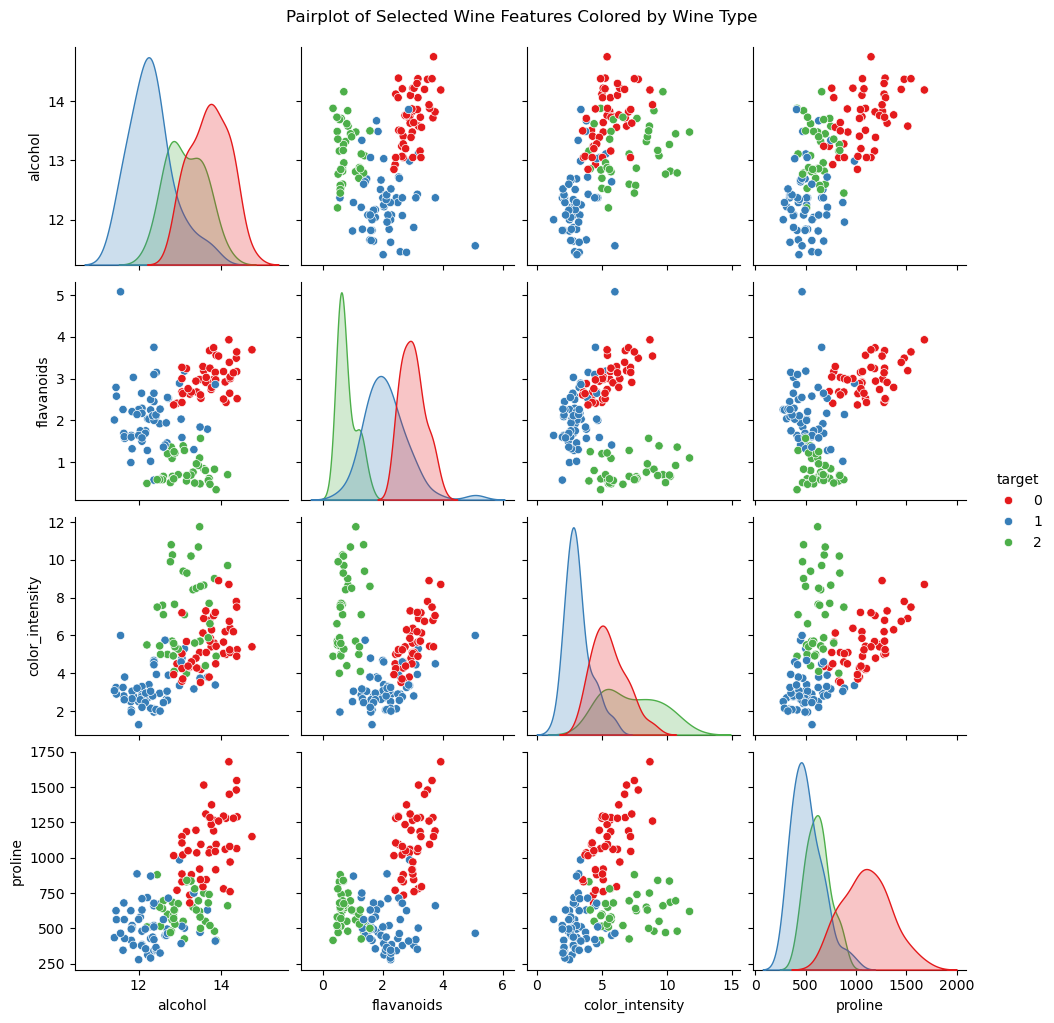

In [102]:


train_file_name = 'wine_train.csv'
trainset = load_dataset(train_file_name)

features = ["alcohol", "flavanoids", "color_intensity", "proline"] 

sns.pairplot(trainset[features + ['target']], hue='target', palette='Set1')

plt.suptitle('Pairplot of Selected Wine Features Colored by Wine Type', y=1.02)
plt.show()


##### במסד נתונים אמיתי היינו מורידים את המופעים החריגים. כיוון שהמסד נתונים פה מאוד קטן החלטנו להשאיר- קיים חריג אחד.

##### טבלת תאימות Correlation Matrix
כל 13 התכונות מוצגות ביחס אחד עם השני, התכונות עם הקשר הגבוהה ביותר יהיו עם ערכים קרובים ל1, עם קשר שלילי יהיו קרובים ל-1. אלו ללא קשר יהיו עם ערך 0 וצבע בהיר.

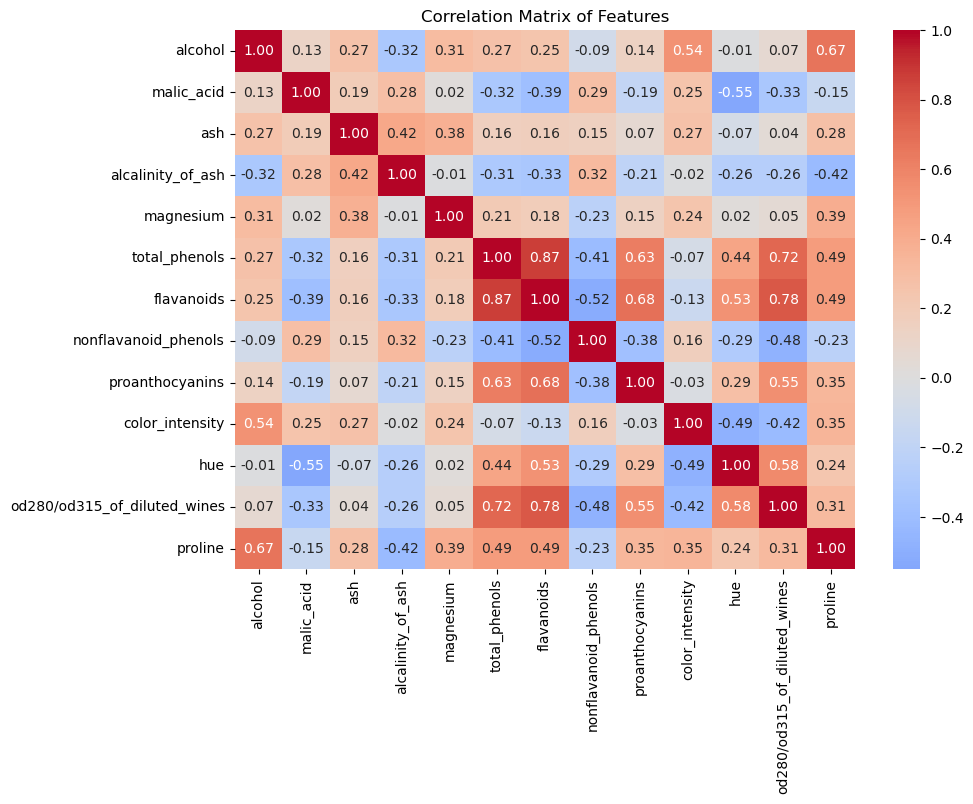

In [168]:
plt.figure(figsize=(10, 7))  # Increase size to avoid scrolling

corr_matrix = trainset.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

#### היסטוגרמת צפיפות

<p dir="rtl">
הגרף מציג היסטוגרמת צפיפות של יחס od280/od315 של יינות מדוללים לפי סוג היין, וממחיש הפרדה ברורה בין שלושת הסוגים – במיוחד של יין מסוג 2, המתאפיין בטווח ערכים צר ועקבי.
מדובר במדד כימי שעשוי לייצג את ריכוזם של חומרים פנוליים ביין, ונמצא ככלי אפקטיבי לסיווג סוגי יין על סמך מאפיינים כימיים.
</p>

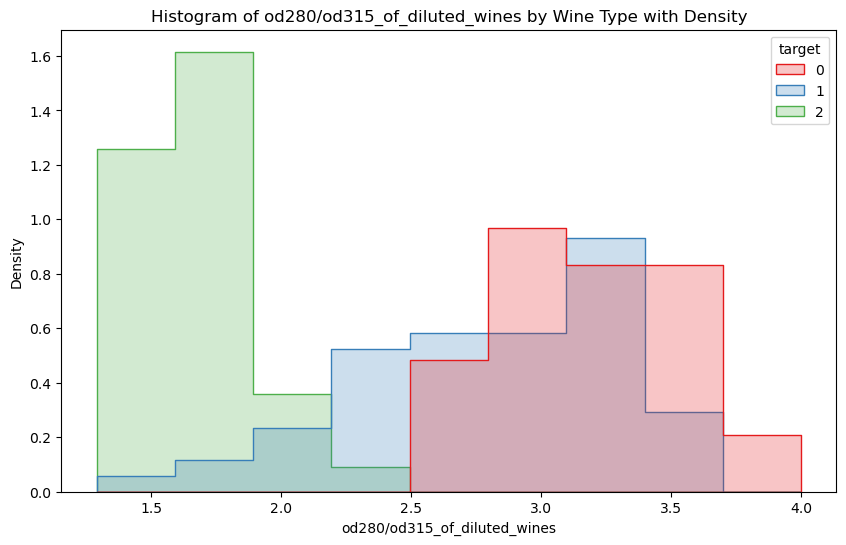

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=trainset, x='od280/od315_of_diluted_wines', hue='target', element='step', stat='density',palette='Set1', common_norm=False)
plt.title('Histogram of od280/od315_of_diluted_wines by Wine Type with Density')
plt.xlabel('od280/od315_of_diluted_wines')
plt.show()


#### Scatter Plot

ניתן לראות את הקשר בין מדד הבהירות/עכירות של היין אל מול הפלנואידים(מאפיינים טעמים, צבעים וכו')
ניתן לראות שהקשר הוא לינארי, והפרדה ברורה בין סוגי היינות לפי שני הפרמטרים.

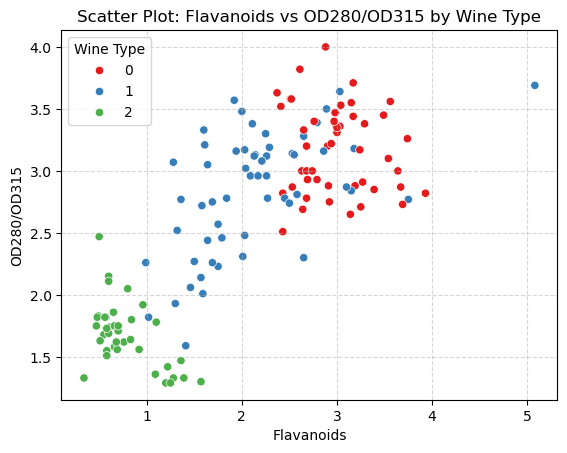

Correlation with flavanoids: 0.7817809974047365


In [109]:


sns.scatterplot(data=trainset,
                x='flavanoids',
                y='od280/od315_of_diluted_wines',
                hue='target',  
                palette='Set1')
plt.title('Scatter Plot: Flavanoids vs OD280/OD315 by Wine Type')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315')
plt.legend(title='Wine Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("Correlation with flavanoids:", trainset['od280/od315_of_diluted_wines'].corr(trainset['flavanoids']))



 #### טבלה
מסכמת את כל הנתונים, ממוצע חציון סטיית תקן אחוזונים ועוד.

In [111]:
summary_table = trainset.describe()
print("\nEDA 4: Summary Statistics of Numerical Features:")
print(summary_table)


EDA 4: Summary Statistics of Numerical Features:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302        

## Part 3 - Experiments
You could add as many code cells as needed

<p dir="rtl">
בחרנו ב2 שיטות, KNN ויער ראנדומי
    
בנוסף בחרנו אלגוריתם בונוס XGBOOST

ביער בחרנו שני הייפר פרמטרס, עומק כל עץ[3,5,10] וכמות עצים[50, 100]

ב KNN בחרנו כמות שכנים ומשקל של כל שכן, לפי מרחק או לא

בנוסף לכל גודמה השתמשנו בcross validation של 5
</p>

In [114]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = trainset.drop(trainset.columns[-1], axis=1)
y = trainset[trainset.columns[-1]]

In [115]:
# Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),     #Feature Engineering	 
     ('feature_sel', SelectFromModel(
         RandomForestClassifier(random_state=10),  # *Feature selection* select which have above median effect on the testing
         threshold='median'                    
    )),   
    ('clf', RandomForestClassifier(random_state=10))
])

#Hyper Parameters
param_grid_rf = {'clf__n_estimators': [10, 20, 50, 100],  'clf__max_depth': [3, 5, 10] }
# we have tested [3, 5, 7, 10, 15, 20, None], None lead to overfit. 5 is the best case also 100 estimators.

grid_rf = GridSearchCV( pipeline_rf,param_grid_rf, cv=5, scoring='f1_macro', verbose=2) # split the dataset to 5, test on 4 and avaluate on fifth
grid_rf.fit(X, y)  
print("Random Forest Best Params:",    grid_rf.best_params_) 
print("Random Forest Best F1 Macro:",  grid_rf.best_score_) # print best hyper parameter for random forest and its F1 score


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............clf__max_depth=3, clf__n_estimators=10; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=10; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=10; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=10; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=10; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=20; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=20; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=20; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=20; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=20; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_estimators=50; total time=   0.1s
[CV] END .............clf__max_depth=3, clf__n_e

In [116]:
# KNN 
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),     #Feature Engineering	    
    ('select', SelectKBest(score_func=mutual_info_classif)),  # Feature selection
    ('clf', KNeighborsClassifier())
])
param_grid_knn = {                    #Hyper Parameters, rule of thumb is to use square(O(n)), we have around 140~ instances so about 12.
    'clf__n_neighbors': [5, 12, 15], # we also plotted with more values between 1-20 and found that the optimal number is close to <12
    'clf__weights': ['uniform', 'distance'] #also uniform/distance gives higher weight for closer points
}

grid_knn = GridSearchCV(
    pipeline_knn,
    param_grid_knn,
    cv=5,
    scoring='f1_macro',
    verbose=2
)
grid_knn.fit(X, y)


print("KNN Best Params:",   grid_knn.best_params_)
print("KNN Best F1 Macro:", grid_knn.best_score_)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...........clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END ...........clf__n_neighbors=5, clf__weights=uniform; total time=   0.1s
[CV] END ...........clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END ...........clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END ...........clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END ..........clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END ..........clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END ..........clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END ..........clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END ..........clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END ..........clf__n_neighbors=12, clf__weights=uniform; total time=   0.0s
[CV] END ..........clf__n_neighbors=12, clf__weig

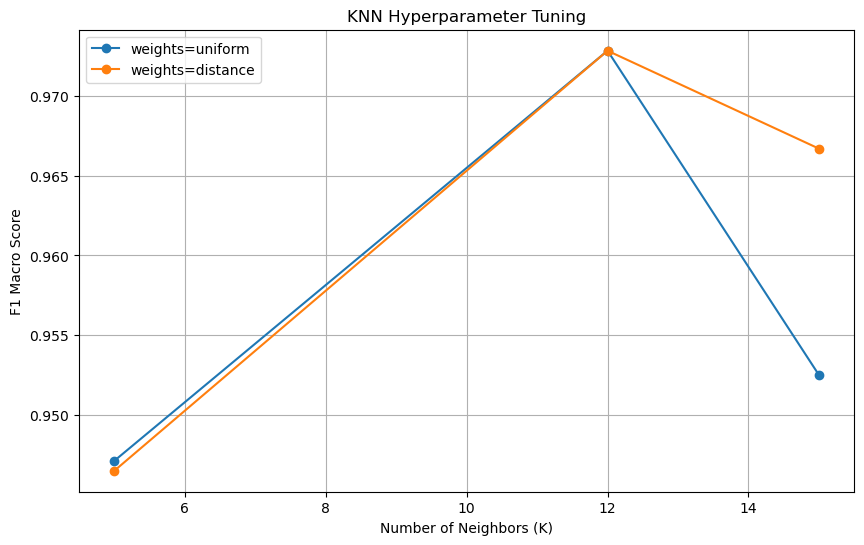

In [174]:
# we decided to keep it but not really used.
import matplotlib.pyplot as plt
params = grid_knn.cv_results_['params']
scores = grid_knn.cv_results_['mean_test_score']

k_values = [p['clf__n_neighbors'] for p in params]
weights = [p['clf__weights'] for p in params]

plt.figure(figsize=(10, 6))

for weight_type in ['uniform', 'distance']:
    xs = [k for k, w in zip(k_values, weights) if w == weight_type]
    ys = [score for score, w in zip(scores, weights) if w == weight_type]
    plt.plot(xs, ys, marker='o', label=f'weights={weight_type}')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Macro Score')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()


In [188]:
# XGBOOST algorithm as a bonus!
# !pip install xgboost  # Uncomment if xgboost is not installed

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV

# Define a machine learning pipeline using XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features (mean=0, std=1)
    ('select', SelectKBest(score_func=mutual_info_classif)),  # Step 2: Select top K features based on mutual information
    ('clf', XGBClassifier(eval_metric='mlogloss', random_state=10))  # Step 3: Train using XGBoost classifier
])

# Define the hyperparameter grid for GridSearchCV
param_grid_xgb = {
    'clf__n_estimators': [50, 100],      # Number of boosting rounds (trees)
    'clf__max_depth': [3, 5, 10],            # Maximum depth of each tree
    'clf__learning_rate': [0.1, 0.3]     # Learning rate (eta) - smaller values = slower but better learning
}

# Perform grid search with cross-validation
grid_xgb = GridSearchCV(
    pipeline_xgb,             # The pipeline to tune
    param_grid_xgb,           # The hyperparameter grid
    cv=5,                     # 5-fold cross-validation
    scoring='f1_macro',       # Use macro F1-score as evaluation metric
    verbose=2                 # Show detailed logs during training
)

# Fit the model to the data (X = features, y = target)
grid_xgb.fit(X, y)

# Output the best hyperparameters and best macro F1 score
print("XGBoost Best Params:", grid_xgb.best_params_)
print("XGBoost Best F1 Macro:", grid_xgb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=50; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=50; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=50; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=50; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=50; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100; total time=   0.0s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=100; total time=   0.0s
[CV] END clf__

In [190]:
#Create result DataFrames
results_rf = pd.DataFrame(grid_rf.cv_results_)
results_rf['model'] = 'RandomForest'
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn['model'] = 'KNN'
results_xgb = pd.DataFrame(grid_xgb.cv_results_)
results_xgb['model'] = 'XGBoost'

# Concatenate all results and sort
summary_df = pd.concat([results_rf, results_knn, results_xgb], ignore_index=True)[[
    'model', 'params', 'mean_test_score', 'std_test_score'
]].sort_values(by='mean_test_score', ascending=False)

print(summary_df.to_string(index=False))

       model                                                                      params  mean_test_score  std_test_score
RandomForest                             {'clf__max_depth': 5, 'clf__n_estimators': 100}         0.978968        0.042063
RandomForest                            {'clf__max_depth': 10, 'clf__n_estimators': 100}         0.978968        0.042063
RandomForest                             {'clf__max_depth': 3, 'clf__n_estimators': 100}         0.972879        0.054242
         KNN                        {'clf__n_neighbors': 12, 'clf__weights': 'distance'}         0.972850        0.026581
         KNN                         {'clf__n_neighbors': 12, 'clf__weights': 'uniform'}         0.972850        0.026581
RandomForest                              {'clf__max_depth': 5, 'clf__n_estimators': 50}         0.971349        0.041001
RandomForest                              {'clf__max_depth': 5, 'clf__n_estimators': 20}         0.971015        0.041083
         KNN            

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [184]:
#best algorithm we had was RandomForest with hyperparameters of max_depth=5 and n_estimators=100

X = trainset.drop(trainset.columns[-1], axis=1)
y = trainset[trainset.columns[-1]]

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Feature engineering
    ('feature_sel', SelectFromModel(
        RandomForestClassifier(random_state=10), 
        threshold='median'
    )),                               # Feature selection
    ('clf', RandomForestClassifier(
        random_state=10,
        max_depth=5,
        n_estimators=100               # BEST parameters are 5 and 100
    ))
])

final_model = final_pipeline.fit(X, y)

## Part 5 - Apply on test and show model performance estimation

In [192]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# we split test and train to find accuracy on both.
X_train = trainset.drop(trainset.columns[-1], axis=1)
y_train = trainset[trainset.columns[-1]]

X_test = testset.drop(testset.columns[-1], axis=1)
y_test = testset[testset.columns[-1]]

#prefiction on test.
y_test_pred = final_model.predict(X_test)

#prediction on train.
y_train_pred = final_model.predict(X_train)

#top 5 predictions of the test dataset
predictions_df = pd.DataFrame({
    'True Label': y_test.values[:5],
    'Predicted Label': y_test_pred[:5]
})
print("Top 5 Predictions on Test Set:")
print(predictions_df)

#summary for each wine type and for all together
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# train and test accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")



Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36


Confusion Matrix:
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]

Train Accuracy: 1.0000
Test Accuracy: 1.0000


### summary
we tested many times and still got 1.0 accuracy. it seems like the test set is too little and the dataset is too distinguish.
when changing the hyper parameters to depth=2 and estimators to 2 and we got - Train Accuracy: 0.9014 Test Accuracy: 0.8611
we also changed the values of the original wine_test.csv to false and got worse accuraty. bottom line we think that the test tadaset is too little and 1.0 accuracy is currect.